In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
sns.set(rc={'figure.figsize':(24, 12)})




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression as LinR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy

In [4]:
import os
os.chdir('C://Users/DeryabinNS/Width')


In [5]:
df = pd.read_excel('df.xlsx', sheet_name = '2300_2')
df1 = pd.read_excel('StainlessSteel.xlsx', sheet_name = '2300_1')
df_11 = pd.read_excel('df1+.xlsx', sheet_name = '2300_2')

In [6]:
df_11.head(1)

,Номер рулона,Длина листа,Начало прокатки,Температура после печи,Отступ,Толщина справа,Толщина в центре,Толщина слева,Разнотолщинность справа,Разнотолщинность в центре,...,Температура в центре,Температура слева,Ширина,Утяжка,"Скорость\n3 клеть, об/мин","Скорость\n4 клеть, об/мин","Скорость\n5 клеть, об/мин","Скорость\n6 клеть, об/мин","Скорость\n7 клеть, об/мин","Скорость\n8 клеть, об/мин"
0,1,29.9,2021-01-21 21:25:42,1035,1.2,20.3991,20.4828,-0.0188,0.3991,0.4828,...,1008.3,928.3,1291.28,0,186,195,102,119,128,138


<AxesSubplot:>

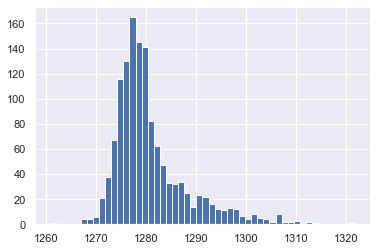

In [10]:
df_11['Ширина'].hist(bins=50)

In [10]:
data_strip = data_strip.rename(columns={'Номер рулона':'coil_id', 'Начало прокатки':'time_of_rolling', 'Отступ':'indent',
                                        'Толщина в центре':'thickness_center', 'Разнотолщинность в центре':'thickness_variation_center',
                                        'Температура в центре':'temperature_center', 'Ширина':'width', 'Утяжка':'tightening',
                                       'Отступ.1':'indent_of_strip', 'Отклонение оси':'axis_deviation',
                                        'Средняя толщина':'average_thickness', 'Размах толщины':'thickness_span',
                                        'Толщина в центре полосы':'thickness_center_strip', 'Разнотолщинность в центре полосы':'off_gauge_strip'})


In [425]:
df_11.isnull().sum()

Номер рулона                 0
Длина листа                  0
Начало прокатки              0
Температура после печи       0
Отступ                       0
Толщина справа               0
Толщина в центре             0
Толщина слева                0
Разнотолщинность справа      0
Разнотолщинность в центре    0
Разнотолщинность слева       0
Температура справа           0
Температура в центре         0
Температура слева            0
Ширина                       0
Утяжка                       0
Скорость\n3 клеть, об/мин    0
Скорость\n4 клеть, об/мин    0
Скорость\n5 клеть, об/мин    0
Скорость\n6 клеть, об/мин    0
Скорость\n7 клеть, об/мин    0
Скорость\n8 клеть, об/мин    0
dtype: int64

In [428]:
numeric_cols = ['Отступ', 'Толщина в центре', 'Ширина', 'Разнотолщинность в центре', 'Температура после печи',
                'Скорость\n3 клеть, об/мин', 'Скорость\n4 клеть, об/мин', 'Скорость\n5 клеть, об/мин',
                'Скорость\n6 клеть, об/мин', 'Скорость\n7 клеть, об/мин', 'Скорость\n8 клеть, об/мин']

In [257]:
numeric_cols = ['Отступ', 'Толщина в центре', 'Ширина', 'Разнотолщинность в центре', 'Температура после печи',
               'Скорость\n3 клеть, об/мин', 'Скорость\n4 клеть, об/мин', 'Скорость\n5 клеть, об/мин', 'Скорость\n6 клеть, об/мин',
               'Скорость\n7 клеть, об/мин', 'Скорость\n8 клеть, об/мин', 'Ток якоря\n3 клеть, кА', 'Ток якоря\n4 клеть, кА',
               'Ток якоря\n5 клеть, кА', 'Ток якоря\n6 клеть, кА', 'Ток якоря\n7 клеть, кА', 'Ток якоря\n8 клеть, кА']

In [343]:
numeric_cols = ['Отступ', 'Толщина в центре', 'Ширина', 'Разнотолщинность в центре', 'Температура после печи']

In [429]:
df_11.dtypes

Номер рулона                          int64
Длина листа                         float64
Начало прокатки              datetime64[ns]
Температура после печи                int64
Отступ                              float64
Толщина справа                      float64
Толщина в центре                    float64
Толщина слева                       float64
Разнотолщинность справа             float64
Разнотолщинность в центре           float64
Разнотолщинность слева              float64
Температура справа                  float64
Температура в центре                float64
Температура слева                   float64
Ширина                              float64
Утяжка                                int64
Скорость\n3 клеть, об/мин             int64
Скорость\n4 клеть, об/мин             int64
Скорость\n5 клеть, об/мин             int64
Скорость\n6 клеть, об/мин             int64
Скорость\n7 клеть, об/мин             int64
Скорость\n8 клеть, об/мин             int64
dtype: object

In [430]:
X = df_11[numeric_cols]
y = df_11['Утяжка']

In [261]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [262]:
print(X_scaled[6])

[ 0.45653618  2.06770226  0.21834573 -2.06770226 -0.33029372 -0.28503837
  0.3585358  -1.3621679  -1.69730056  1.47905714  1.95389115 -0.2925894
  0.19545493  1.90252019  1.97238039 -1.94271585 -1.94403838]


In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [432]:
print(sum(y_train == 0), sum(y_train == 1))
print(sum(y_test == 0), sum(y_test == 1))

751 136
394 44


In [159]:
def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'],
                      optimizer.cv_results_['mean_test_score'][i],
                      optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2],
                     scores[:,1]+scores[:,2], alpha=0.3)
    plt.title('label')
    plt.show()

In [348]:
params_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000]}
cv = 5

In [433]:
estimator = LR(penalty = 'l2', class_weight = 'balanced', n_jobs=4)
optimizer = GridSearchCV(estimator, params_grid, scoring = 'accuracy', cv=cv)

In [350]:
est = LinR()
opt = GridSearchCV(est, params_grid, scoring = 'accuracy', cv=cv)

In [351]:
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
est.coef_

array([-1.41094093e-03, -7.01980481e-02, -3.41379798e-04,  7.73697486e-02,
       -9.45316312e-05])

In [315]:
y_p = est.predict(X_test)

In [318]:
mse = mean_squared_error(y_test, y_p)
mae = mean_absolute_error(y_test, y_p)


In [320]:
R, p = scipy.stats.spearmanr(y_test, y_p)

In [321]:
print('R = {0}, p = {1}, n = {2}'.format(round(R, 5), round(p, 5), y_test.shape[0]))
print("[{3}] = {0} {2} {1} • [{4}]".format(est.intercept_, est.coef_[0], "-" if est.coef_[0]<0 else "+", y_p, y_test))
print("MSE = {0}, MAE = {1}".format(round(mse, 5), round(mae, 5)))

R = 0.6989, p = 0.00061, n = 20
[[1304.52217924 1284.94014799 1278.66964017 1293.90108549 1287.85811674
 1307.24483549 1297.83077299 1279.91671049 1287.08956205 1286.57686674
 1302.94796049 1288.33467924 1281.10616361 1289.50362455 1302.91085111
 1287.75557767 1276.94893705 1292.90889799 1295.17061674 1305.03194486]] = 1296.0299917367788 - -9.337746670480465 • [26    1290
35    1285
43    1280
28    1285
11    1284
2     1294
34    1290
46    1270
40    1290
22    1295
4     1290
10    1285
30    1280
41    1280
33    1295
42    1270
48    1260
7     1300
14    1290
32    1320
Name: Утяжка, dtype: int64]
MSE = 97.88858, MAE = 8.38675


In [434]:
optimizer.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=4, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [435]:
print(y_test[:10])
print(optimizer.predict(X_test)[:10])

1295    0
406     0
1062    0
202     0
1192    0
186     0
45      0
487     0
1193    0
1178    0
Name: Утяжка, dtype: int64
[0 1 1 0 0 0 0 1 0 0]


In [436]:
roc_auc = roc_auc_score(y_test, optimizer.predict_proba(X_test)[:,1])
print(roc_auc)

0.9169935394554684


In [437]:
optimizer.best_params_

{'C': 1000}

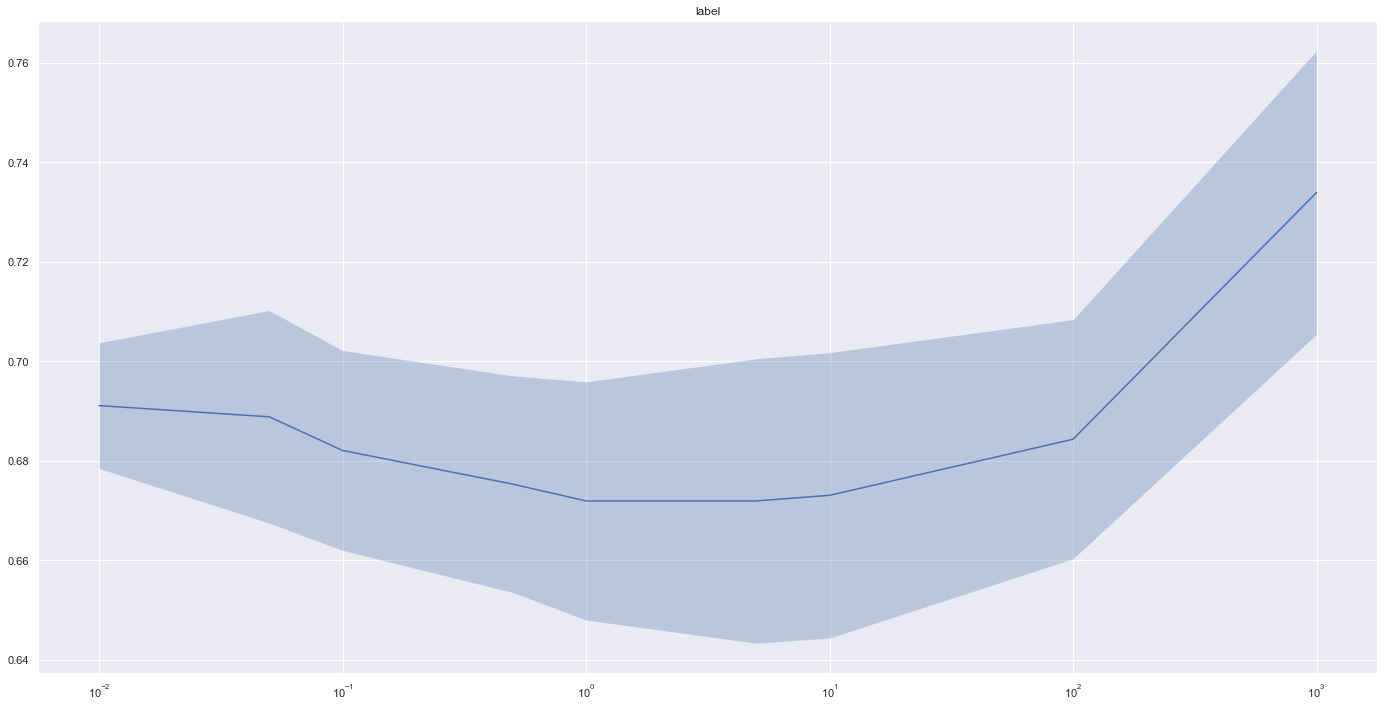

In [438]:
plot_scores(optimizer)

In [439]:
X.columns

Index(['Отступ', 'Толщина в центре', 'Ширина', 'Разнотолщинность в центре',
       'Температура после печи', 'Скорость\n3 клеть, об/мин',
       'Скорость\n4 клеть, об/мин', 'Скорость\n5 клеть, об/мин',
       'Скорость\n6 клеть, об/мин', 'Скорость\n7 клеть, об/мин',
       'Скорость\n8 клеть, об/мин'],
      dtype='object')

In [440]:
optimizer.best_estimator_.coef_

array([[-0.02814286,  1.23404722, -0.01877731, -1.44327458, -0.00353216,
         0.28090666,  0.28922391,  0.28710864, -0.5716267 ,  0.46828235,
         0.41568706]])

In [441]:
optimizer.best_estimator_

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=4, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [442]:
cross_val_score(optimizer, X_train, y_train, cv=cv).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

0.7338635861503013

In [445]:
accuracy_score(y_test, y_pred)

0.7168949771689498

In [444]:
y_pred = optimizer.predict(X_test)

## Решающие деревья


In [446]:
rfc = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', max_depth = 5, random_state = 0)

In [447]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [448]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.9785563235804691

In [449]:
cross_val_score(rfc, X_test, y_test, cv=5).mean()

0.9748942917547568

In [279]:
data = pd.DataFrame()

In [281]:
data['y_test'] = y_test
data['y_pred'] = y_p


In [450]:
y_tree_pred = rfc.predict(X_test)

In [451]:
print(accuracy_score(y_test, y_tree_pred))
print(accuracy_score(y_test, y_pred))

0.9908675799086758
0.7168949771689498


In [452]:
print(precision_score(y_test, y_tree_pred))
print(precision_score(y_test, y_pred))

1.0
0.2619047619047619


In [453]:
print(recall_score(y_test, y_tree_pred))
print(recall_score(y_test, y_pred))

0.9090909090909091
1.0


In [454]:
f1_RF = (2 * precision_score(y_test, y_tree_pred) * recall_score(y_test, y_tree_pred)) / (precision_score(y_test, y_tree_pred) + recall_score(y_test, y_tree_pred))
f1_LR = (2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred)) / (precision_score(y_test, y_pred) + recall_score(y_test, y_pred))

In [455]:
print(f1_RF)
print(f1_LR)

0.9523809523809523
0.41509433962264153


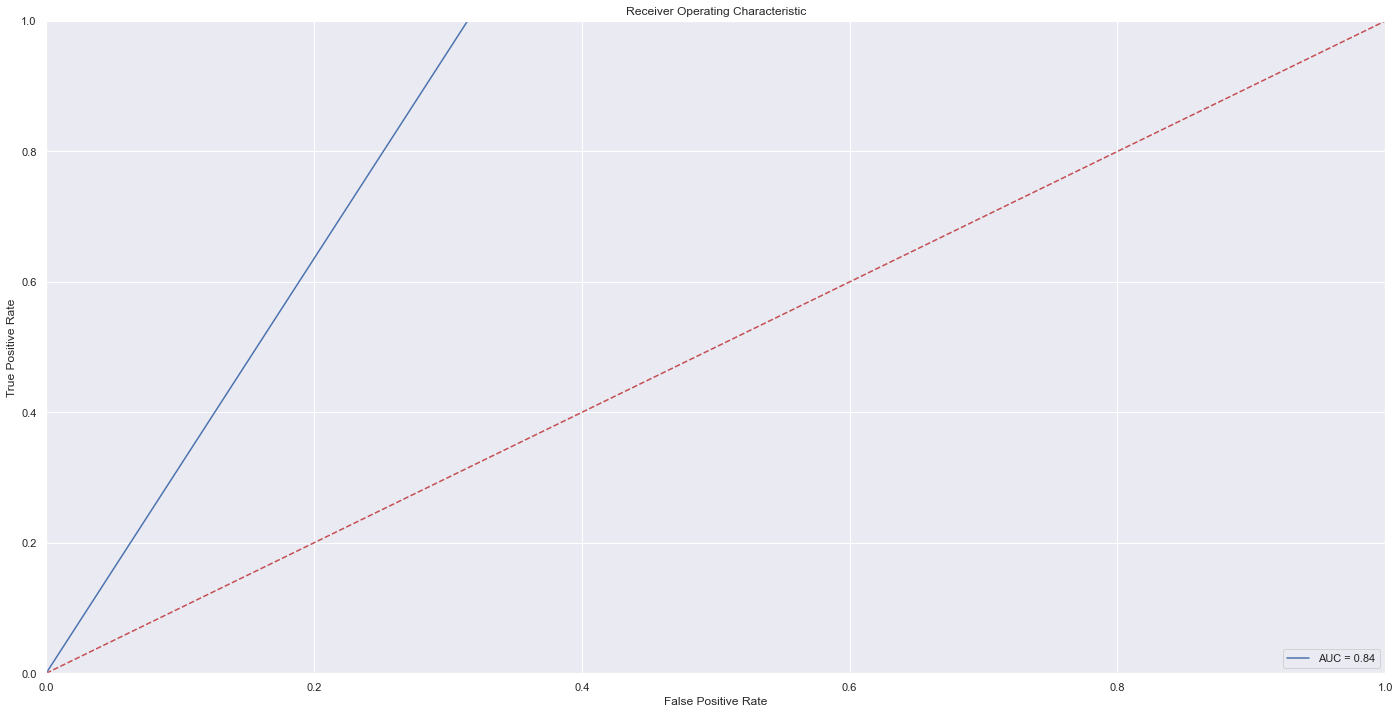

In [456]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

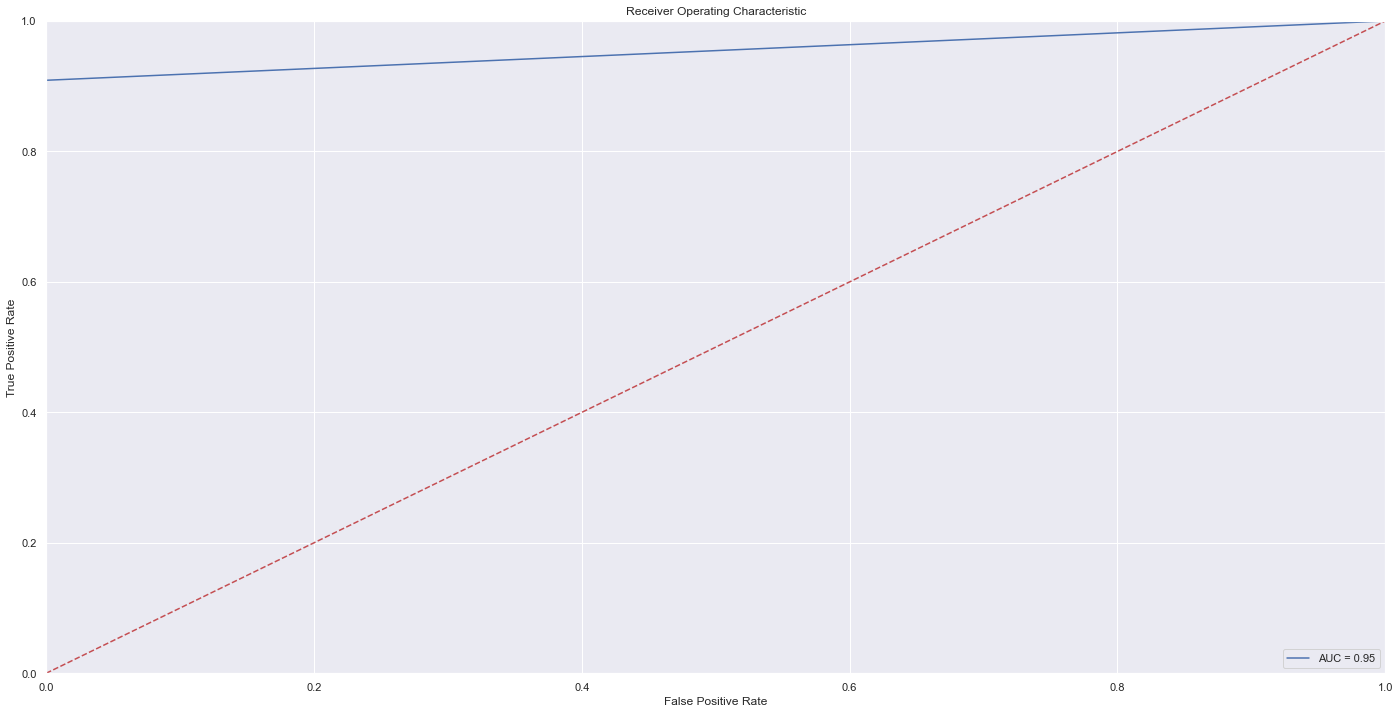

In [457]:
fpr, tpr, threshold = roc_curve(y_test, y_tree_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [458]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[270 124]
 [  0  44]]


In [459]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81       394
           1       0.26      1.00      0.42        44

    accuracy                           0.72       438
   macro avg       0.63      0.84      0.61       438
weighted avg       0.93      0.72      0.77       438



In [460]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       394
           1       1.00      0.91      0.95        44

    accuracy                           0.99       438
   macro avg       0.99      0.95      0.97       438
weighted avg       0.99      0.99      0.99       438



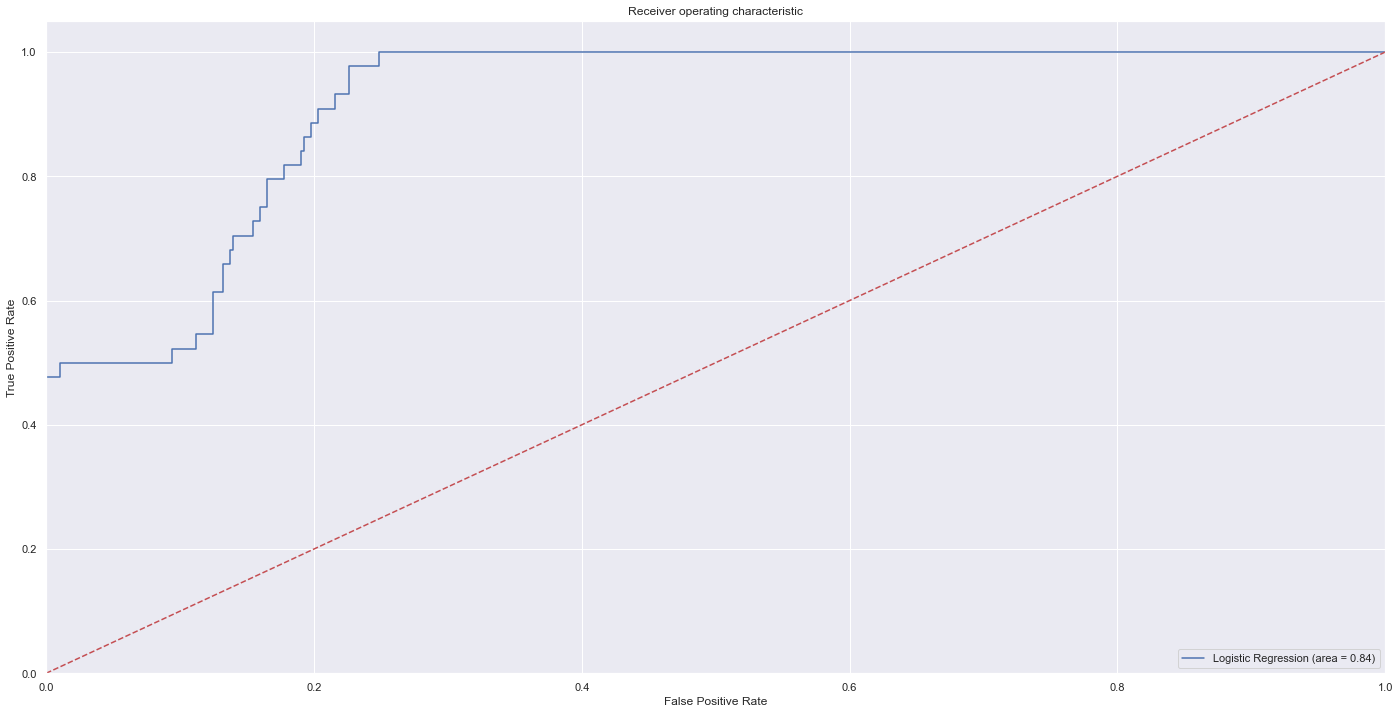

In [461]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, optimizer.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, optimizer.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [370]:
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 17 and input n_features is 5 

<AxesSubplot:>

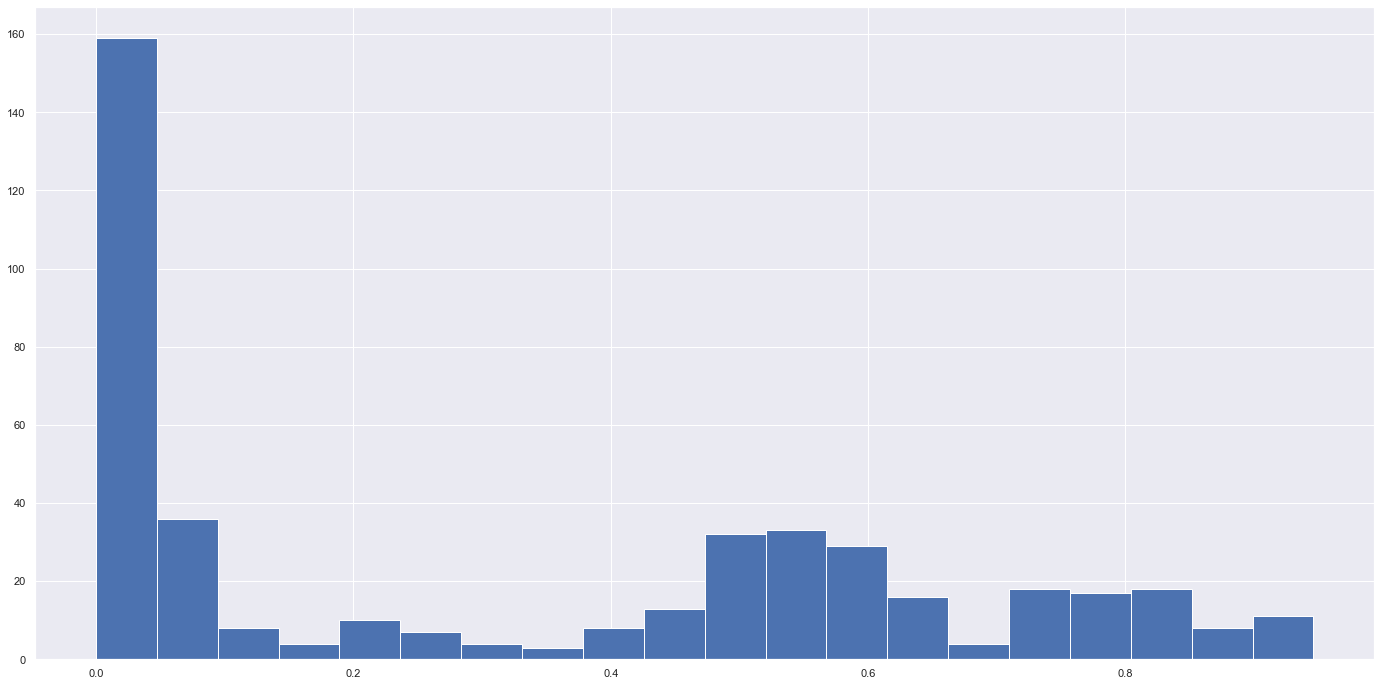

In [462]:
pd.Series(optimizer.predict_proba(X_test)[:,1]).hist(bins=20)

In [463]:
y_pp = np.where(optimizer.predict_proba(X_test)[:,1] > 0.605, 1, 0)

In [464]:
print(precision_score(y_test, y_pp))
print(precision_score(y_test, y_pred))

0.3402061855670103
0.2619047619047619


In [465]:
print(recall_score(y_test, y_pp))
print(recall_score(y_test, y_pred))

0.75
1.0


In [466]:
f1_LR = (2 * precision_score(y_test, y_pp) * recall_score(y_test, y_pp)) / (precision_score(y_test, y_pp) + recall_score(y_test, y_pp))

In [467]:
f1_LR

0.4680851063829786